# RIC and RBDS 3D running study: an example of collaborative and reproducible research
> Reginaldo K Fukuchi$^{1,2}$, Reed Ferber$^{2}$ 

> $^{1}$Biomedical Engineering, Federal University of ABC, Brazil
> $^{2}$Faculty of Kinesiology, University of Calgary, Canada


This notebook presents the comparison of 3D running kinematics between runners from Brazil and Canada. The data were collected using similar experimental procedures and by the same experimenter (RKF) in both centres. 

The notebook uses the raw marker trajectories from standing calibration and running trials; and outputs 3D joint angles of the hip, knee and ankle joints during the gait cycle. 

All the analyses were performed using computer programs written in Python and they are provided along with the markers data and the notebook itself. Therefore, the consistency of the results presented here can be assessed by any user interested in reproducing this reseach.

The data are from published data sets (Fukuchi et al. (2017) and Ferber et al. (in preparation).

<p style="text-align: right;">A <a href="https://jupyter.org/">Jupyter Notebook</a></p>

In [103]:
# Prepare environment
import os
import scipy.io as spio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [104]:
# Import data
pathname = r'../data'

## Choose RIC or RBDS data set

In [105]:
db_name = 'RBDS'

In [106]:
if db_name=='RIC':
    fname_out_S = os.path.join(pathname, 'RIC_static.csv')
    fname_out_R = os.path.join(pathname, 'RIC_run.csv')
else:
    fname_out_S = os.path.join(pathname, 'RBDS_static.csv')
    fname_out_R = os.path.join(pathname, 'RBDS_run.csv')
    
print('Static trial filename: ' + fname_out_S)
print('Running trial filename: ' + fname_out_R)

Static trial filename: ../data\RBDS_static.csv
Running trial filename: ../data\RBDS_run.csv


In [107]:
df_s = pd.read_csv(fname_out_S, delimiter=',', index_col='Time')

In [108]:
df_s.head()

,LMAL_X,LMAL_Y,LMAL_Z,LMAM_X,LMAM_Y,LMAM_Z,LASI_X,LASI_Y,LASI_Z,LGTR_X,...,RTBM_Z,RTTL_X,RTTL_Y,RTTL_Z,RTTM_X,RTTM_Y,RTTM_Z,RTUB_X,RTUB_Y,RTUB_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,705.062866,108.774330,1050.909424,725.535095,119.272575,1129.002441,876.648743,1067.346436,1126.366577,799.197205,...,1345.514282,725.082825,761.838928,1398.587158,676.568359,760.431702,1347.822632,780.426636,462.710876,1343.646973
0.006711,705.066833,108.766876,1050.910889,725.530396,119.266960,1129.005005,876.686035,1067.344360,1126.387573,799.232788,...,1345.495483,725.089050,761.827515,1398.581421,676.584167,760.432800,1347.808350,780.445190,462.712555,1343.645752
0.013423,705.065430,108.771133,1050.902832,725.532959,119.267067,1129.006104,876.736938,1067.349854,1126.407471,799.294189,...,1345.485840,725.094055,761.832520,1398.583130,676.592529,760.428711,1347.793579,780.457764,462.725372,1343.636353
0.020134,705.067078,108.770615,1050.907104,725.535950,119.267815,1129.002930,876.780396,1067.346436,1126.431274,799.340088,...,1345.468140,725.094055,761.823364,1398.575684,676.612793,760.425476,1347.788452,780.471008,462.721649,1343.632812
0.026846,705.060730,108.771179,1050.905151,725.534241,119.267807,1129.004883,876.821350,1067.347900,1126.442627,799.390625,...,1345.458984,725.103516,761.824829,1398.569946,676.621399,760.423767,1347.771729,780.485840,462.709076,1343.625610


### Calculate hip joint center
* https://c-motion.com/v3dwiki/index.php?title=Coda_Pelvis
* RHJC=(-0.19*ASIS_Distance,-0.3*ASIS_Distance,0.36*ASIS_Distance)

In [109]:
RASI = df_s[['RASI_X','RASI_Y','RASI_Z']].values.mean(axis=0)
LASI = df_s[['LASI_X','LASI_Y','LASI_Z']].values.mean(axis=0)
ASIS_distance_S = np.linalg.norm(RASI-LASI)
rhjc_S = np.array([RASI[0]-0.19*ASIS_distance_S, RASI[1]-0.3*ASIS_distance_S, 
                   RASI[2]-0.36*ASIS_distance_S])

In [110]:
# Shank reference system
rkjc_S = (df_s[['RKNL_X','RKNL_Y','RKNL_Z']].values.mean(axis=0)+
        df_s[['RKNM_X','RKNM_Y','RKNM_Z']].values.mean(axis=0))/2
rajc_S = (df_s[['RMAL_X','RMAL_Y','RMAL_Z']].values.mean(axis=0)+
        df_s[['RMAM_X','RMAM_Y','RMAM_Z']].values.mean(axis=0))/2

v2 = rkjc_S - rajc_S
v1 = np.cross(v2, df_s[['RMAL_X','RMAL_Y','RMAL_Z']].values.mean(axis=0) - rajc_S)
v3 = np.cross(v1, v2)

print('Versors of the shank:')
v1 = v1/np.linalg.norm(v1)
print('v1 =', v1)
v2 = v2/np.linalg.norm(v2)
print('v2 =', v2)
v3 = v3/np.linalg.norm(v3)
print('v3 =', v3)

bs = np.array([v1, v2, v3])

Versors of the shank:
v1 = [ 0.97670129 -0.03645553  0.21148426]
v2 = [ 0.05076583  0.99674458 -0.06263446]
v3 = [-0.20851241  0.07191133  0.97537241]


In [111]:
# Thigh reference system
v2t = rhjc_S-rkjc_S
v1t = np.cross(v2t,df_s[['RKNL_X','RKNL_Y','RKNL_Z']].values.mean(axis=0)-rkjc_S)
v3t = np.cross(v2t,v1t)

print('Versors of the thigh:')
v1t = v1t/np.linalg.norm(v1t)
print('v1t =', v1t)
v2t = v2t/np.linalg.norm(v2t)
print('v2t =', v2t)
v3t = v3t/np.linalg.norm(v3t)
print('v3t =', v3t)

bt = np.array([v1t,v2t,v3t])

Versors of the thigh:
v1t = [ 0.98291093 -0.18387985 -0.00861974]
v2t = [ 0.18066167  0.97257537 -0.14648725]
v3t = [-0.0353194  -0.14242666 -0.989175  ]


# Running data

In [112]:
df_r = pd.read_csv(fname_out_R, delimiter=',', index_col='Time')

In [113]:
df_r.head()

,LASI_X,LASI_Y,LASI_Z,LHED_X,LHED_Y,LHED_Z,LHEL_X,LHEL_Y,LHEL_Z,LHEP_X,...,RTBL_Z,RTBM_X,RTBM_Y,RTBM_Z,RTTL_X,RTTL_Y,RTTL_Z,RTTM_X,RTTM_Y,RTTM_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,2420.259766,992.218079,963.925171,2248.016602,36.936264,1112.201294,2269.700439,54.548782,1068.700684,2260.437256,...,1220.158203,2340.021729,534.565857,1166.274048,2355.980225,648.041931,1231.687134,2306.586182,637.986877,1182.760010
0.006668,2418.855469,990.269226,964.056519,2224.396729,37.268295,1111.626831,2246.146484,54.657806,1068.011963,2236.888672,...,1221.252930,2352.635742,532.309326,1168.092407,2365.203125,646.438843,1233.347290,2315.817139,634.595154,1184.833984
0.013336,2418.053711,988.938965,964.259094,2200.811035,37.668098,1111.173828,2222.609863,54.926060,1067.611816,2213.396240,...,1222.161255,2366.121582,531.614136,1169.939331,2374.555420,646.219849,1234.858398,2324.990723,632.330994,1187.102295
0.020004,2416.767334,987.159058,965.014771,2177.300537,38.305260,1111.021484,2199.177979,55.535648,1067.508057,2190.177246,...,1222.913574,2379.001953,532.383545,1171.363647,2383.882324,647.272034,1236.181274,2333.870605,631.130493,1189.600342
0.026673,2415.681396,985.919983,965.522888,2153.892822,38.982204,1110.988770,2175.719238,56.226032,1067.396606,2166.902100,...,1223.486572,2391.377197,534.346802,1172.849243,2392.567627,649.902832,1237.175293,2342.278076,631.113098,1192.028198


## Gait events (TD and TO)
These gait events were detected in another NB (RIC_RBDS_gait_events_detection.ipynb) using the method of Zeni.

In [114]:
if db_name=='RIC':
    iTD = np.array([  100,   236,   375,   515,   654,   791,   930,  1068,  1205,
        1342,  1481,  1618,  1757,  1896,  2038,  2175,  2311,  2447,
        2583,  2718,  2856,  2990,  3126,  3264,  3399,  3539,  3677,
        3814,  3951,  4092,  4231,  4369,  4506,  4645,  4783,  4924,
        5063,  5202,  5340,  5478,  5615,  5751,  5888,  6027,  6164,
        6302,  6438,  6577,  6713,  6849,  6989,  7126,  7262,  7402,
        7539,  7675,  7811,  7949,  8087,  8223,  8361,  8495,  8634,
        8772,  8913,  9049,  9184,  9322,  9458,  9594,  9730,  9867,
       10003, 10138, 10274, 10412, 10548, 10686, 10821, 10956, 11097,
       11233, 11369, 11506, 11643, 11783, 11919, 11990],
      dtype=np.int64)
    iTO = np.array([   37,   172,   313,   453,   591,   729,   866,  1005,  1141,
        1279,  1420,  1555,  1694,  1835,  1973,  2113,  2249,  2387,
        2522,  2655,  2792,  2927,  3065,  3202,  3339,  3474,  3613,
        3750,  3889,  4028,  4167,  4306,  4445,  4582,  4722,  4862,
        5000,  5139,  5276,  5414,  5552,  5691,  5826,  5964,  6102,
        6240,  6375,  6514,  6650,  6786,  6925,  7064,  7202,  7339,
        7477,  7613,  7750,  7888,  8025,  8162,  8296,  8435,  8571,
        8710,  8851,  8990,  9123,  9260,  9397,  9532,  9668,  9805,
        9942, 10076, 10213, 10350, 10486, 10626, 10758, 10895, 11034,
       11168, 11307, 11443, 11579, 11717, 11857, 11993], dtype=np.int64)
else:
    iTD = np.array([  37,  143,  248,  352,  456,  559,  666,  772,  876,  982, 1089,
           1193, 1298, 1399, 1504, 1610, 1717, 1821, 1930, 2033, 2139, 2245,
           2351, 2456, 2563, 2668, 2775, 2877, 2985, 3088, 3195, 3298, 3404,
           3506, 3612, 3716, 3824, 3929, 4033, 4140, 4246, 4348, 4456],
          dtype=np.int64)
    iTO = np.array([  85,  192,  298,  402,  507,  610,  717,  819,  900, 1032, 1135,
           1241, 1346, 1449, 1556, 1659, 1766, 1871, 1978, 2081, 2187, 2293,
           2399, 2505, 2611, 2717, 2823, 2927, 3032, 3139, 3242, 3345, 3453,
           3558, 3661, 3767, 3872, 3977, 4057, 4189, 4293, 4397], dtype=np.int64)

## Reconstruct anatomical markers using SVD algorithm

In [115]:
import sys
sys.path.insert(1, r'./../functions')
from svdt import svdt

### The RIC marker protocol does not have RASI and LASI markers in the running trials, so we have to create virtual ones

In [116]:
RPSIr = df_r[['RPSI_X','RPSI_Y','RPSI_Z']].values
LPSIr = df_r[['LPSI_X','LPSI_Y','LPSI_Z']].values
RHEDr = df_r[['RHED_X','RHED_Y','RHED_Z']].values
if db_name=='RIC':
    # Pelvic segment
    Ap = df_s[['RPSI_X','RPSI_Y','RPSI_Z','LPSI_X','LPSI_Y','LPSI_Z',
               'VSAC_X','VSAC_Y','VSAC_Z']].values.mean(axis=0)
    Bp = df_r[['RPSI_X','RPSI_Y','RPSI_Z','LPSI_X','LPSI_Y','LPSI_Z',
               'VSAC_X','VSAC_Y','VSAC_Z']].values
    
    # Reconstructed markers based on technical clusters
    Rp, Lp, RMSEp = svdt(Ap, Bp)    
    RASIs = df_s[['RASI_X','RASI_Y','RASI_Z']].values.mean(axis=0)
    LASIs = df_s[['LASI_X','LASI_Y','LASI_Z']].values.mean(axis=0)
    RASIr = np.dot(Rp,RASIs)  + Lp
    LASIr = np.dot(Rp,LASIs)  + Lp
    VSACr = df_r[['VSAC_X','VSAC_Y','VSAC_Z']].values
else:
    RASIr = df_r[['RASI_X','RASI_Y','RASI_Z']].values
    LASIr = df_r[['LASI_X','LASI_Y','LASI_Z']].values
    VSACr  = (RPSIr+LPSIr)/2

In [117]:
# Thigh segment
At = df_s[['RTTL_X','RTTL_Y','RTTL_Z','RTTM_X','RTTM_Y','RTTM_Z',
             'RTBL_X','RTBL_Y','RTBL_Z','RTBM_X','RTBM_Y','RTBM_Z']].values.mean(axis=0)
Bt = df_r[['RTTL_X','RTTL_Y','RTTL_Z','RTTM_X','RTTM_Y','RTTM_Z',
             'RTBL_X','RTBL_Y','RTBL_Z','RTBM_X','RTBM_Y','RTBM_Z']].values
Rt, Lt, RMSEt = svdt(At, Bt)

In [118]:
# Shank segment
As = df_s[['RSTL_X','RSTL_Y','RSTL_Z','RSTM_X','RSTM_Y','RSTM_Z',
             'RSBL_X','RSBL_Y','RSBL_Z','RSBM_X','RSBM_Y','RSBM_Z']].values.mean(axis=0)
Bs = df_r[['RSTL_X','RSTL_Y','RSTL_Z','RSTM_X','RSTM_Y','RSTM_Z',
             'RSBL_X','RSBL_Y','RSBL_Z','RSBM_X','RSBM_Y','RSBM_Z']].values
Rs, Ls, RMSEs = svdt(As, Bs)

In [119]:
# Foot segment
Af = df_s[['RHED_X','RHED_Y','RHED_Z','RHEP_X','RHEP_Y','RHEP_Z',
             'RHEL_X','RHEL_Y','RHEL_Z']].values.mean(axis=0)
Bf = df_r[['RHED_X','RHED_Y','RHED_Z','RHEP_X','RHEP_Y','RHEP_Z',
             'RHEL_X','RHEL_Y','RHEL_Z']].values
Rf, Lf, RMSEf = svdt(Af, Bf)

In [120]:
# knee markers
RKNLs = df_s[['RKNL_X','RKNL_Y','RKNL_Z']].values.mean(axis=0)
RKNMs = df_s[['RKNM_X','RKNM_Y','RKNM_Z']].values.mean(axis=0)
RKNLr = np.empty(shape=(Rt.shape[0],3))
RKNMr = np.empty(shape=(Rt.shape[0],3))
# ankle markers
RMALs = df_s[['RMAL_X','RMAL_Y','RMAL_Z']].values.mean(axis=0)
RMAMs = df_s[['RMAM_X','RMAM_Y','RMAM_Z']].values.mean(axis=0)
RMALr = np.empty(shape=(Rs.shape[0],3))
RMAMr = np.empty(shape=(Rs.shape[0],3))
# foot markers
RMH1s = df_s[['RMH1_X','RMH1_Y','RMH1_Z']].values.mean(axis=0)
RMH5s = df_s[['RMH5_X','RMH5_Y','RMH5_Z']].values.mean(axis=0)
RMH1r = np.empty(shape=(Rs.shape[0],3))
RMH5r = np.empty(shape=(Rs.shape[0],3))
# Reconstructed markers based on technical clusters
RKNLr = np.dot(Rt,RKNLs)  + Lt
RKNMr = np.dot(Rt,RKNMs)  + Lt
RMALr = np.dot(Rs,RMALs)  + Ls
RMAMr = np.dot(Rs,RMAMs)  + Ls
RMH1r = np.dot(Rf,RMH1s)  + Ls
RMH5r = np.dot(Rf,RMH5s)  + Ls
RTOEr = (RMH1r+RMH5r)/2

### Hip, knee and ankle joint centres

In [121]:
ASIS_distanceR = np.linalg.norm(RASIr-LASIr, axis=1)
rhjc_R = np.array([RASIr[:,0]-0.19*ASIS_distanceR, RASIr[:,1]-0.3*ASIS_distanceR, RASIr[:,2]-0.36*ASIS_distanceR]).T

In [122]:
rkjc_R = (RKNLr+RKNMr)/2
rajc_R = (RMALr+RMAMr)/2

In [123]:
def pelvisCS(RASIr, LASIr, VSACr):
    # Pelvic reference system
    midASIS = (RASIr+LASIr)/2
    
    v2p = np.cross(RASIr-VSACr,LASIr-VSACr)
    v3p = RASIr-midASIS
    v1p = np.cross(v2p,v3p)

    v1p = v1p/np.linalg.norm(v1p)
    v2p = v2p/np.linalg.norm(v2p)
    v3p = v3p/np.linalg.norm(v3p)

    bp = np.array([v1p,v2p,v3p])
    
    return bp

In [124]:
def thighCS(rhjc_R, rkjc_R, RKNLr):
    # Thigh reference system
    v2t = rhjc_R-rkjc_R
    v1t = np.cross(v2t,RKNLr-rkjc_R)
    v3t = np.cross(v1t,v2t)

    v1t = v1t/np.linalg.norm(v1t)
    v2t = v2t/np.linalg.norm(v2t)
    v3t = v3t/np.linalg.norm(v3t)

    bt = np.array([v1t,v2t,v3t])
    
    return bt

In [125]:
def shankCS(rkjc_R, rajc_R, RMALr):
    # Shank reference system
    v2s = rkjc_R-rajc_R
    v1s = np.cross(v2s,RMALr-rajc_R)
    v3s = np.cross(v1s,v2s)

    v1s = v1s/np.linalg.norm(v1s)
    v2s = v2s/np.linalg.norm(v2s)
    v3s = v3s/np.linalg.norm(v3s)

    bs = np.array([v1s,v2s,v3s])
    
    return bs

In [126]:
def footCS(RHEDr, RMH1r, RMH5r, RTOEr):
    # Foot reference system
    v2f = np.cross(RMH1r-RHEDr, RMH5r-RHEDr)
    v3f = np.cross(RTOEr-RHEDr, v2f)
    v1f = np.cross(v2f, v3f)
    
    v1f = v1f/np.linalg.norm(v1f)
    v2f = v2f/np.linalg.norm(v2f)
    v3f = v3f/np.linalg.norm(v3f)
    
    bf = np.array([v1f,v2f,v3f])
    
    return bf

## Calculate knee joint angle according to Grood & Suntay (1983)

In [127]:
def hipang(p_hip_rf, d_hip_rf):
    """
    Calculate 3D hip joint angle in degrees
    """
    bp = p_hip_rf
    bt = d_hip_rf
    angh = np.empty(shape=(3,))
    yh = bt[1,:];
    zh = bp[2,:];
    fh = np.cross(yh,zh); #floating axis
    fh = fh/np.linalg.norm(fh)
    bh =np.array([fh, yh, zh]);
    zt_t = bt[2,:];
    
    # knee angle
    angh[0] = (np.pi/2 - np.arccos(np.sum(bp[1]*fh)))*180/np.pi # Flexion/Extension
    angh[1] = (-np.pi/2 - np.arccos(np.sum(yh*bp[2])))*180/np.pi + 180 #Abduction/aduction
    angh[2] = (np.pi/2 - np.arccos(np.sum(zt_t*fh)))*180/np.pi #Internal/external rotation
    
    return angh

In [128]:
def kneeang(proxrf, distalrf):
    """
    Calculate 3D knee joint angle in degrees
    """
    angk = np.empty(shape=(3,))
    proxrf = bt
    distalrf = bs
    yk = bs[1,:];
    zk = bt[2,:];
    fk = np.cross(yk,zk); #floating axis
    fk = fk/np.linalg.norm(fk)
    bk =np.array([fk, yk, zk]);
    zs_t = bs[2,:];
    
    # knee angle
    angk[0] = -(np.pi/2 - np.arccos(np.sum(bt[1]*fk)))*180/np.pi # Flexion/Extension
    angk[1] = (-np.pi/2 - np.arccos(np.sum(yk*bt[2])))*180/np.pi + 180 #Abduction/aduction
    angk[2] = (np.pi/2 - np.arccos(np.sum(zs_t*fk)))*180/np.pi #Internal/external rotation
    
    return angk

In [129]:
def ankleang(p_ank_rf, d_ank_rf):
    """
    Calculate 3D ankle joint angle in degrees
    """
    bs = p_ank_rf
    bf = d_ank_rf
    anga = np.empty(shape=(3,))
    ya = bf[1,:];
    za = bs[2,:];
    fa = np.cross(ya,za); #floating axis
    fa = fa/np.linalg.norm(fa)
    ba =np.array([fa, ya, za]);
    
    # knee angle
    anga[0] = (np.pi/2 - np.arccos(np.sum(bs[1]*fa)))*180/np.pi # Flexion/Extension
    anga[1] = (-np.pi/2 - np.arccos(np.sum(ya*bs[2])))*180/np.pi + 180 #Abduction/aduction
    anga[2] = (np.pi/2 - np.arccos(np.sum(bf[2]*fa)))*180/np.pi #Internal/external rotation
    
    return anga

### Joint angles during running

In [130]:
angh_r = np.empty(shape=(rkjc_R.shape[0],3))
angk_r = np.empty(shape=(rkjc_R.shape[0],3))
anga_r = np.empty(shape=(rkjc_R.shape[0],3))
for i in range(rkjc_R.shape[0]):
    bp = pelvisCS(RASIr[i,:],LASIr[i,:],VSACr[i,:])
    bt = thighCS(rhjc_R[i,:],rkjc_R[i,:],RKNLr[i,:])
    bs = shankCS(rkjc_R[i,:],rajc_R[i,:],RMALr[i,:])
    bf = footCS(RHEDr[i,:], RMH1r[i,:], RMH5r[i,:], RTOEr[i,:])
    # Hip angle
    angh_r[i,:] = hipang(bp, bt)
    # Knee angle
    angk_r[i,:] = kneeang(bt, bs)
    # Ankle angle
    anga_r[i,:] = ankleang(bs, bf)

In [131]:
time = df_r.index.values

## Ensemble average curve using tnorma

In [132]:
from tnorma import tnorma

In [133]:
ang_hip = np.empty(shape=(101,iTD.shape[0]-1,3))
ang_knee= np.empty(shape=(101,iTD.shape[0]-1,3))
for i in range(iTD.shape[0]-1):
    ang_hip[:,i,:], tn, indie = tnorma(angh_r[iTD[i]:iTD[i+1],:], k=1, 
                                       smooth=0, mask=None, show=False)
    ang_knee[:,i,:], tn, indie= tnorma(angk_r[iTD[i]:iTD[i+1],:], k=1, 
                                       smooth=0, mask=None, show=False)

# RIC and RBDS data

ang_hipM_RIC = np.mean(ang_hip, axis=1)
ang_kneeM_RIC= np.mean(ang_knee, axis=1)

In [134]:
ang_hipM_RBDS = np.mean(ang_hip, axis=1)
ang_kneeM_RBDS= np.mean(ang_knee, axis=1)

<IPython.core.display.Javascript object>


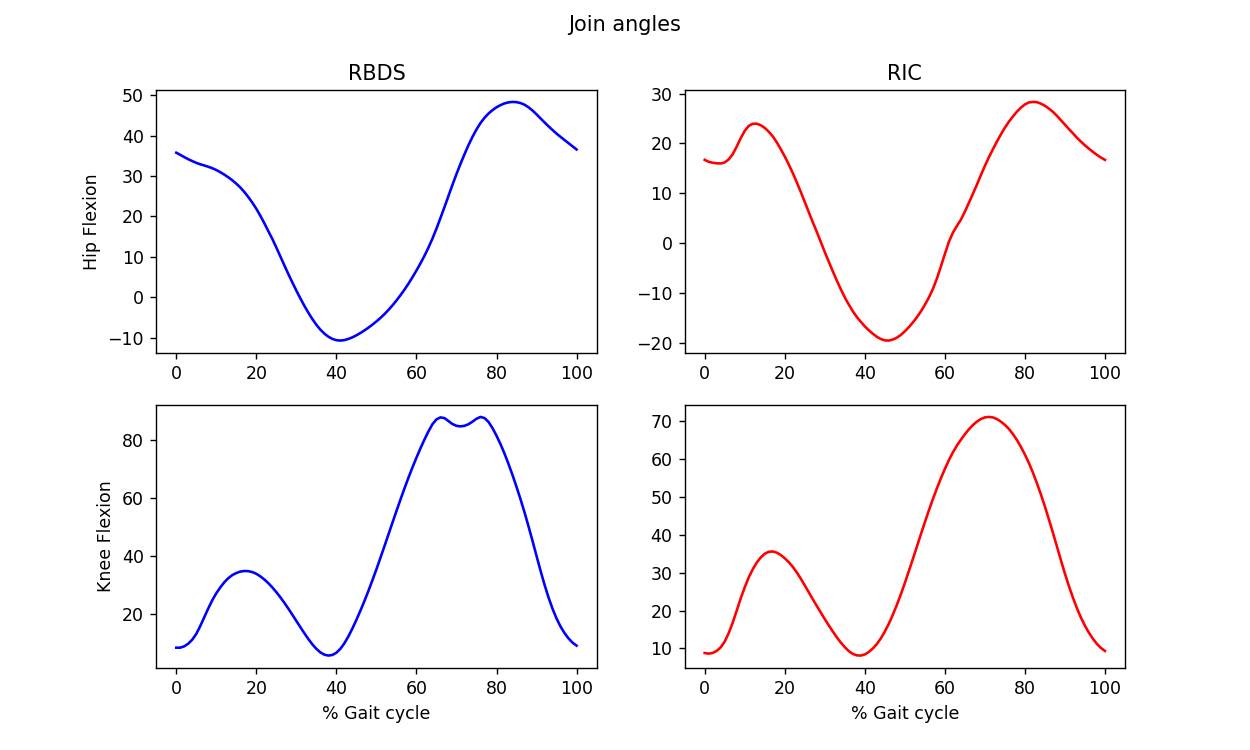

In [140]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.suptitle('Join angles')
axs[0,0].plot(tn,ang_hipM_RBDS[:,0],'b')
axs[0,0].set_title('RBDS')
axs[0,0].set_ylabel('Hip Flexion')
axs[0,1].plot(tn,ang_hipM_RIC[:,0],'r')
axs[0,1].set_title('RIC')
axs[1,0].plot(tn,ang_kneeM_RBDS[:,0],'b')
axs[1,0].set_ylabel('Knee Flexion')
axs[1,0].set_xlabel('% Gait cycle')
axs[1,1].plot(tn,ang_kneeM_RIC[:,0],'r')
axs[1,1].set_xlabel('% Gait cycle')
plt.show()

# References
* Fukuchi RK, Fukuchi CA, Duarte M. 2017. A public dataset of running biomechanics and the effects of running speed on lower extremity kinematics and kinetics. PeerJ 5:e3298 https://doi.org/10.7717/peerj.3298
* Ferber et al. (in preparation). WeTrac 3D gait data set.